In [2]:
import os
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from collections import Counter

In [3]:
# === CONFIGURATION ===
os.getcwd()

mask_dir = 'images/new_inclusion_masks_neeharika'  # Replace with your path
num_classes = 5
foreground_classes = [1, 2, 3, 4]
# === HELPER ===
def count_classes_in_mask(mask_path):
    mask = Image.open(mask_path).convert('L')  # Grayscale
    mask_np = np.array(mask)
    return Counter(mask_np.flatten())

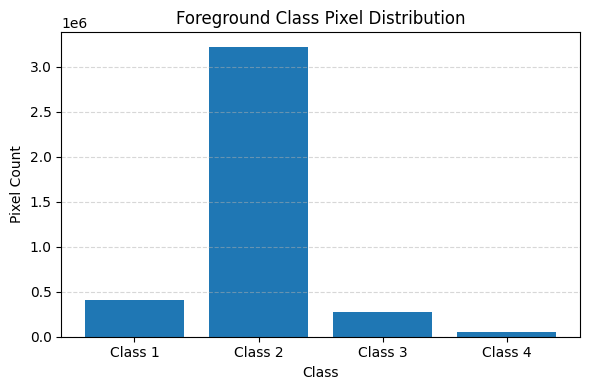

Class 1: 412016 pixels (10.40%)
Class 2: 3224228 pixels (81.35%)
Class 3: 278260 pixels (7.02%)
Class 4: 48877 pixels (1.23%)


In [4]:
# === MAIN SCRIPT ===
total_counts = Counter()

for filename in os.listdir(mask_dir):
    if filename.lower().endswith(('.png', '.jpg', '.jpeg', '.tif')):
        full_path = os.path.join(mask_dir, filename)
        total_counts.update(count_classes_in_mask(full_path))

# Extract only foreground class counts
pixel_counts = [total_counts.get(cls_id, 0) for cls_id in foreground_classes]

# === PLOT ===
plt.figure(figsize=(6, 4))
plt.bar(foreground_classes, pixel_counts, tick_label=[f'Class {i}' for i in foreground_classes])
plt.title('Foreground Class Pixel Distribution')
plt.xlabel('Class')
plt.ylabel('Pixel Count')
plt.grid(True, axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

# Optional: Print percentages
total_fg_pixels = sum(pixel_counts)
for cls_id, count in zip(foreground_classes, pixel_counts):
    pct = (count / total_fg_pixels) * 100 if total_fg_pixels else 0
    print(f"Class {cls_id}: {count} pixels ({pct:.2f}%)")